## Final Project - Multiclass Classification using Weather Dataset

Team Members: Vamshi Gujjari, Hemant Koti <br>
[Dataset](https://drive.google.com/drive/folders/1bYXD_MoZqwvyMyjgPuKTuR7b1zlXIGBQ?usp=sharing) <br>
[Model](https://drive.google.com/file/d/1T2KKV5dd3kPrGtN6rv3CRadLGEoTzzPl/view?usp=sharing) <br>

In [ ]:
import os
import torch
import torchvision
from torch import Tensor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout

In [ ]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
weather_data_dir = '/content/drive/My Drive/Colab Notebooks/weather_data'

In [ ]:
class_labels = os.listdir(weather_data_dir + "/Train")

In [ ]:
class_labels

['Shine', 'Cloudy', 'Sunrise', 'Rain']

In [ ]:
from torchvision import transforms
transformations = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [ ]:
training_set = ImageFolder(weather_data_dir + '/Train', transform=transformations)  
testing_set= ImageFolder(weather_data_dir + '/Test', transform=transformations)

In [ ]:
training_set.classes

['Cloudy', 'Rain', 'Shine', 'Sunrise']

In [ ]:
train_size = int(0.8 * len(training_set))
train_set, valid_set = torch.utils.data.dataset.random_split(training_set, [train_size, len(training_set) - train_size])

In [ ]:
len(train_set)

721

In [ ]:
len(testing_set)

223

In [ ]:
len(valid_set)

181

In [ ]:
batch_size = 10
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(testing_set, batch_size=batch_size)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

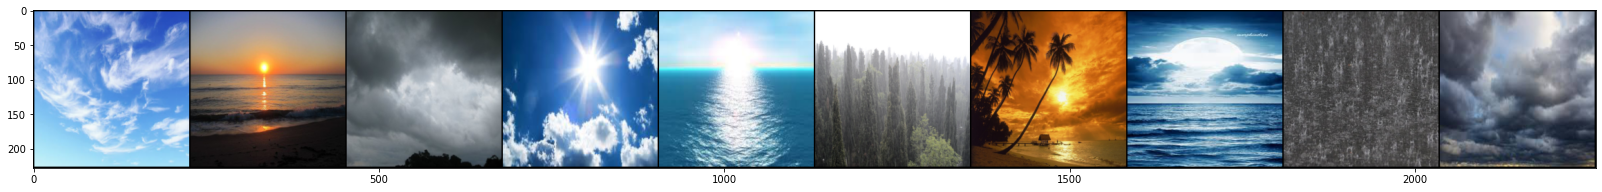

In [ ]:
images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images, nrow = 20, padding = 2)
plt.figure(figsize = (28, 28))  
plt.imshow(grid.permute(1, 2, 0))

In [ ]:
class CNN_Model(Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        # self.layer2 = nn.Sequential(
        #     nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
        #     nn.BatchNorm2d(64),
        #     nn.ReLU()
        # )
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        # self.avgpool = nn.AdaptiveAvgPool2d(output_size=2)
        self.fc1 = nn.Linear(7 * 7* 512, 512)
        self.dropout1 = nn.Dropout2d(0.5)
        # self.fc2 = nn.Linear(512, 512)
        # self.dropout2 = nn.Dropout2d(0.5)
        self.fc3 = nn.Linear(512,4)

    def forward(self, x):
        x = self.layer1(x)
        # x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.layer7(x)
        # x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        # x = F.relu(self.fc2(x))
        # x = self.dropout2(x)
        return self.fc3(x)



In [ ]:
model = CNN_Model().to(device)

/usr/local/lib/python3.6/dist-packages/torch/cuda/__init__.py:125: UserWarning: 
Tesla T4 with CUDA capability sm_75 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the Tesla T4 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


In [ ]:
%%time
epochs = 40
train_loss_vals = []
val_loss_vals = []
train_accuracy = []
accuracy = []
pred_list = []
labels_list = []
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()
train_total = 0
train_corr = 0
count = 0
running_loss = 0
for epoch in range(epochs):
    for images, labels in train_loader:
        # print("Labels: ", labels)
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        # print("outputs: ", outputs)
        train_pred = torch.max(outputs, 1)[1].to(device)
        train_total += len(labels)
        train_corr +=(train_pred == labels).sum()
        train_acc = (train_corr/(train_total*1.0))*100
        # print("Acc:",train_acc)
        loss = criterion(outputs, labels)
        running_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count+=1
        if(count%50 == 0):
            correct=0
            total=0
            train_loss_vals.append(running_loss/len(train_loader))
            train_accuracy.append(train_acc)
            model.eval()
            with torch.no_grad():
                for val_im, val_labels in valid_loader:
                    labels_list.append(val_labels)
                    val_im, val_labels = val_im.to(device), val_labels.to(device)
                    outputs = model(val_im)
                    val_loss = criterion(outputs, val_labels)
                    predictions = torch.max(outputs, 1)[1].to(device)
                    pred_list.append(predictions)
                    total += len(val_labels)
                    correct += (predictions == val_labels).sum()
                    # print("Correct: ", correct)
                    acc = (correct/(total*1.0)) * 100
                # acc = (correct/(total*1.0)) * 100
            # loss_vals.append(loss.data)
            val_loss_vals.append(val_loss/len(valid_loader))
            accuracy.append(acc)
            running_loss = 0
            model.train()
        if count % 300 == 0:
            print('Iteration: {}   Training Loss: {}   Train Accuracy: {}   Validation Loss: {}   Validation Accuracy: {} %'.format(count, loss.data, train_acc.data ,val_loss.data, acc))
        

Iteration: 300   Training Loss: 0.8088277578353882   Train Accuracy: 65.85694885253906   Validation Loss: 1.8246551752090454   Validation Accuracy: 75.69061279296875 %
Iteration: 600   Training Loss: 0.249637633562088   Train Accuracy: 69.92240142822266   Validation Loss: 0.05221610888838768   Validation Accuracy: 83.42542266845703 %
Iteration: 900   Training Loss: 0.32113274931907654   Train Accuracy: 72.97571563720703   Validation Loss: 0.08814842253923416   Validation Accuracy: 82.32044219970703 %
Iteration: 1200   Training Loss: 0.1324855536222458   Train Accuracy: 75.43016052246094   Validation Loss: 0.2406320422887802   Validation Accuracy: 77.90055084228516 %
Iteration: 1500   Training Loss: 0.21888549625873566   Train Accuracy: 77.7597885131836   Validation Loss: 0.4099251627922058   Validation Accuracy: 88.95027923583984 %
Iteration: 1800   Training Loss: 0.03957981988787651   Train Accuracy: 79.97076416015625   Validation Loss: 0.3487085700035095   Validation Accuracy: 87.292

In [ ]:
torch.save(model.state_dict(), 'drive/My Drive/Colab Notebooks/weather_model_4.pth')

In [ ]:
accuracy

[tensor(76.2431, device='cuda:0'),
 tensor(77.3481, device='cuda:0'),
 tensor(79.0055, device='cuda:0'),
 tensor(80.6630, device='cuda:0'),
 tensor(79.5580, device='cuda:0'),
 tensor(75.6906, device='cuda:0'),
 tensor(79.0055, device='cuda:0'),
 tensor(67.4033, device='cuda:0'),
 tensor(82.3204, device='cuda:0'),
 tensor(77.3481, device='cuda:0'),
 tensor(79.0055, device='cuda:0'),
 tensor(83.4254, device='cuda:0'),
 tensor(70.7182, device='cuda:0'),
 tensor(88.3978, device='cuda:0'),
 tensor(79.5580, device='cuda:0'),
 tensor(74.0331, device='cuda:0'),
 tensor(81.7680, device='cuda:0'),
 tensor(82.3204, device='cuda:0'),
 tensor(75.6906, device='cuda:0'),
 tensor(86.7403, device='cuda:0'),
 tensor(90.0553, device='cuda:0'),
 tensor(89.5028, device='cuda:0'),
 tensor(91.7127, device='cuda:0'),
 tensor(77.9006, device='cuda:0'),
 tensor(90.6077, device='cuda:0'),
 tensor(83.9779, device='cuda:0'),
 tensor(83.9779, device='cuda:0'),
 tensor(90.0553, device='cuda:0'),
 tensor(88.3978, dev

In [ ]:
torch.mean(torch.stack(accuracy))

tensor(84.4828, device='cuda:0')

In [ ]:
images, labels = next(iter(test_loader))
images = images.to(device)
op = model(images)
torch.max(op, 1)[1].to(device)

tensor([0, 3, 2, 0, 0, 0, 0, 1, 2, 0], device='cuda:0')

In [ ]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
model = CNN_Model().to(device)
model.load_state_dict(torch.load('drive/My Drive/Colab Notebooks/weather_model_4.pth'))

<All keys matched successfully>

In [ ]:
## https://discuss.pytorch.org/t/how-to-classify-single-image-using-loaded-net/1411
from torch.autograd import Variable
from PIL import Image 

loader = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0) 
    return image.cuda()

image = image_loader("/content/drive/My Drive/Colab Notebooks/weather_data/Test/Sunrise/sunrise266.jpg")
outputs = model(image)


In [ ]:
 _, op = torch.max(outputs, 1)

In [ ]:
# Prediction output
testing_set.classes[op[0].item()]

'Sunrise'

In [ ]:
image = image_loader("/content/drive/My Drive/Colab Notebooks/weather_data/Test/Cloudy/cloudy201.jpg")
outputs = model(image)

In [ ]:
 _, op = torch.max(outputs, 1)

In [ ]:
# Prediction output
testing_set.classes[op[0].item()]

'Cloudy'

**Progress**

We trained the weather dataset using a CNN model with 6 Conv layers, 40 epochs and saved our model. We got a decent accuracy of over 84.4828%.

**Work remaining**
1. To build a front end application using flask that accepts an image as an input (weather image).
2. The model and the application needs to be deployed on Heroku and it must work real-time